# Difference in Difference Analysis of Nightlights


$y = \beta_0 + \beta_1g + \beta_2t + \beta_3(t*g) + \epsilon$

where:

$y$ is absolute brightness of the site  
$g$ is 0 for the control group and 1 for the treatment group  
$t$ is 0 for before and 1 for after treatment
$\beta_0$ is the baseline value of control sites  
$\beta_1$ is the baseline value of the treatment sites  
$\beta_2$  is the time dependence for control sites & pre-treatment sites  
$\beta_3$ is the time dependence for treatment sites post-treatment  
$\epsilon$ is the error  

Now we need to format out data in this way.

In [1]:
# read in nightlight_values.csv and plot the data
import pandas as pd

# read in the data
df = pd.read_csv('data/nightlight_values_v2.csv')
print('Data has been read in.')

Data has been read in.


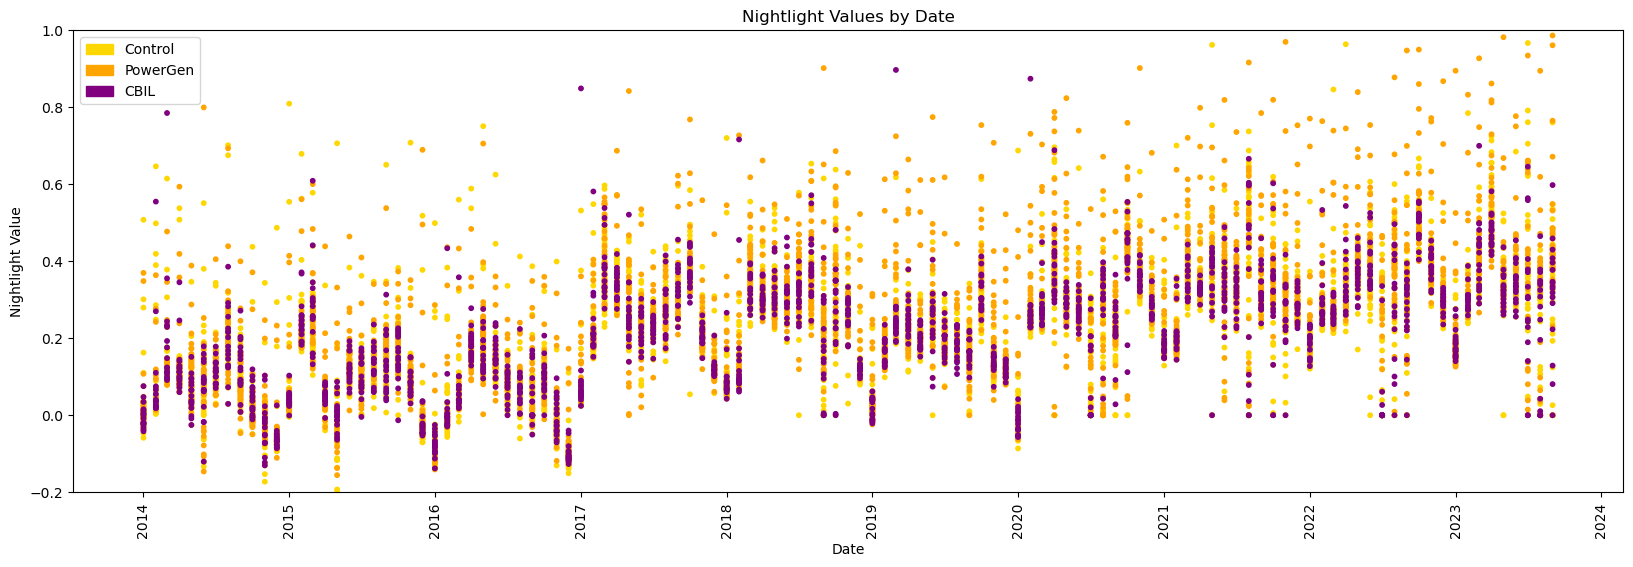

In [2]:
# plot the image values by date with a different color for each site_type
import matplotlib.pyplot as plt

# convert datetime to date
df['image_datetime'] = pd.to_datetime(df['image_date'])

# create a figure
plt.figure(figsize=(20,6))
plt.title('Nightlight Values by Date')
plt.xlabel('Date')
plt.ylabel('Nightlight Value')

# create a scatter plot with different colors for each site type
colors = {'Control': 'gold', 'PowerGen': 'orange', 'CBIL': 'purple'}
plt.scatter(df['image_datetime'], df['image_value'], s=10, c=df['site_type'].apply(lambda x: colors[x]))

# rotate the x axis labels
plt.xticks(rotation=90)
plt.ylim(-0.2, 1.0)

# add a legend
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colors[key], label=key) for key in colors]
plt.legend(handles=patches)

plt.show()

In [3]:
# inspect the dates commissioned
df.groupby(['site_type', 'date_commissioned']).count()

site_name  image_date  image_value  \
site_type date_commissioned                                       
CBIL      2018-03-07               585         585          585   
          2019-09-22               117         117          117   
          2019-12-25               117         117          117   
          2020-05-09               117         117          117   
          2021-02-14               117         117          117   
          2021-12-31               819         819          819   
          2022-04-23               117         117          117   
Control   2030-01-01              4680        4680         4680   
PowerGen  2019-07-04               117         117          117   
          2019-07-07               117         117          117   
          2019-10-20               117         117          117   
          2019-10-25               117         117          117   
          2019-10-27               585         585          585   
          2019-11-03               234         234          234   
          2019-11-10               351         351          351   
          2020-01-01               117         117          117   
          2020-01-26               117         117          117   
          2020-06-25               117         117          117   
          2020-10-20               351         351          351   
          2021-04-17               117         117          117   
          2021-04-18               351         351          351   
          2021-04-25               117         117          117   
          2021-05-30               234         234          234   
          2021-06-06               234         234          234   
          2021-07-04               234         234          234   
          2022-02-12               117         117          117   
          2022-05-21               234         234          234   
          2022-06-04               117         117          117   
          2022-08-02               117         117          117   
          2022-08-13               117         117          117   

                             image_datetime  
site_type date_commissioned                  
CBIL      2018-03-07                    585  
          2019-09-22                    117  
          2019-12-25                    117  
          2020-05-09                    117  
          2021-02-14                    117  
          2021-12-31                    819  
          2022-04-23                    117  
Control   2030-01-01                   4680  
PowerGen  2019-07-04                    117  
          2019-07-07                    117  
          2019-10-20                    117  
          2019-10-25                    117  
          2019-10-27                    585  
          2019-11-03                    234  
          2019-11-10                    351  
          2020-01-01                    117  
          2020-01-26                    117  
          2020-06-25                    117  
          2020-10-20                    351  
          2021-04-17                    117  
          2021-04-18                    351  
          2021-04-25                    117  
          2021-05-30                    234  
          2021-06-06                    234  
          2021-07-04                    234  
          2022-02-12                    117  
          2022-05-21                    234  
          2022-06-04                    117  
          2022-08-02                    117  
          2022-08-13                    117

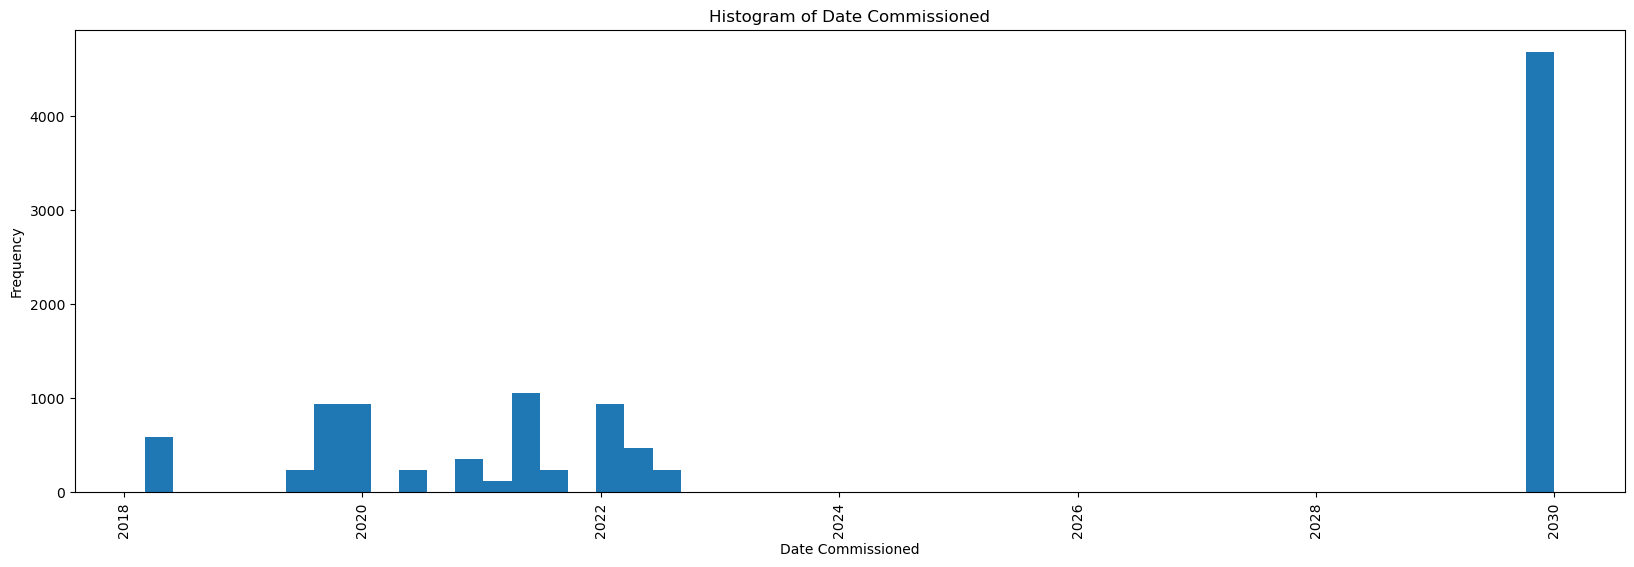

In [6]:
# sort date commissioned from lowest to highest
df['datetime_commissioned'] = pd.to_datetime(df['date_commissioned'])
df = df.sort_values('datetime_commissioned')
# create a histogram of the datetime_commissioned
plt.figure(figsize=(20,6))
plt.title('Histogram of Date Commissioned')
plt.xlabel('Date Commissioned')
plt.ylabel('Frequency')
plt.hist(df['datetime_commissioned'], bins=50)
plt.xticks(rotation=90)
plt.show()

In [88]:
# latest date commissioned is 2022-08-13, so we'll set the control sites date commissioned to 2022-08-13
# earliest date commissioned is 2018-03-07, so we'll try that as well and see if it makes a difference
df.loc[df['site_type'] == 'Control', 'date_commissioned'] = '2022-08-13'

In [89]:
# convert date columns to datetimes
df['datetime_commissioned'] = pd.to_datetime(df['date_commissioned'])
df['image_datetime'] = pd.to_datetime(df['image_date'])

# create a variable t that is 0 if the image was taken before the site was commissioned and 1 if the image was taken after the site was commissioned
df['t'] = df['image_datetime'] > df['datetime_commissioned']


# create a variable g that is 0 if the site_type is Control and 1 if the site_type is PowerGen or CBIL
df['g'] = df['site_type'] != 'Control'

# convert from boolean to int
df['t'] = df['t'].astype(int)
df['g'] = df['g'].astype(int)

# rename target variable
df['y'] = df['image_value']

# find earliest datetime in df
min_datetime = df['image_datetime'].min()

# create a variable t0 that is the number of days since the earliest datetime in df
df['day'] = (df['image_datetime'] - min_datetime).dt.days

# create an interaction term called tg that is the product of t and g
df['tg'] = df['t'] * df['g']

# inspect 
df

# pull out just t, g, y, and day for analysis
df_dind = df[['t', 'g', 'y', 'tg', 'day']]

# export to csv
df_dind.to_csv('data/nightlight_dind.csv', index=False)


## Conduct the Analysis
Now that we've prepared out data, we can conduct the difference in difference analysis.

In [90]:
# import statsmodels and estimate the DiD model
import statsmodels.api as sm

# read in the data
df = pd.read_csv('data/nightlight_dind.csv')

# add a column of 1s to have a constant term in the regression
X = sm.add_constant(df[['g', 't', 'tg']])
y = df['y']

model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     73.47
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           4.82e-47
Time:                        14:38:19   Log-Likelihood:                -8241.5
No. Observations:               10998   AIC:                         1.649e+04
Df Residuals:                   10994   BIC:                         1.652e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3099      0.008     39.034      0.0

In [91]:
# try analysis again without outliers, any y values > 1

# read in the data
df = pd.read_csv('data/nightlight_dind.csv')

# filter out any values over 1
df = df[df['y'] <= 1]

# add a column of 1s to have a constant term in the regression
X = sm.add_constant(df[['g', 't', 'tg']])
y = df['y']

model_1 = sm.OLS(y, X).fit()

# Display the regression results
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     487.4
Date:                Fri, 22 Dec 2023   Prob (F-statistic):          3.86e-297
Time:                        14:38:23   Log-Likelihood:                 4956.4
No. Observations:               10853   AIC:                            -9905.
Df Residuals:                   10849   BIC:                            -9876.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2036      0.002     84.497      0.0

In [92]:
# get overall mean brightness
print('Average brightness all sites all time:', df['y'].mean())
print('Median brightness all sites all time:', df['y'].median())

# get average brightness for g=0, g=1
print('Average brightness Control sites all time:', df[df['g'] == 0]['y'].mean())
print('Median brightness Control sites all time:', df[df['g'] == 0]['y'].median())
print('Average brightness Treatment sites all time:', df[df['g'] == 1]['y'].mean())
print('Median brightness Treatment sites all time:', df[df['g'] == 1]['y'].median())

# get average brightness for t=0, t=1 only for g=1 sites
print('Average brightness Pre-Treatment Treatment Sites:', df[(df['t'] == 0) & (df['g'] == 1)]['y'].mean())
print('Median brightness Pre-Treatment Treatment Sites:', df[(df['t'] == 0) & (df['g'] == 1)]['y'].median())
print('Average brightness Post-Treatment Treatment Sites:', df[(df['t'] == 1) & (df['g'] == 1)]['y'].mean())
print('Median brightness Post-Treatment Treatment Sites:', df[(df['t'] == 1) & (df['g'] == 1)]['y'].median())

# get max day value
print('Max day value:', df['day'].max())

# get the average brightness for day 0 of control sites
print('Average brightness Control sites Day 0:', df[(df['g'] == 0) & (df['day'] == 0)]['y'].mean())
print('Median brightness Control sites Day 0:', df[(df['g'] == 0) & (df['day'] == 0)]['y'].median())

# get the average brightness for day 0 of treatment sites
print('Average brightness Treatment sites Day 0:', df[(df['g'] == 1) & (df['day'] == 0)]['y'].mean())
print('Median brightness Treatment sites Day 0:', df[(df['g'] == 1) & (df['day'] == 0)]['y'].median())

# get the average brightness for day 3530 of control sites
print('Average brightness Control sites Day 3530:', df[(df['g'] == 0) & (df['day'] == 3530)]['y'].mean())
print('Median brightness Control sites Day 3530:', df[(df['g'] == 0) & (df['day'] == 3530)]['y'].median())

# get the average brightness for day 3530 of treatment sites
print('Average brightness Treatment sites Day 3530:', df[(df['g'] == 1) & (df['day'] == 3530)]['y'].mean())
print('Median brightness Treatment sites Day 3530:', df[(df['g'] == 1) & (df['day'] == 3530)]['y'].median())

Average brightness all sites all time: 0.22639714687334656
Median brightness all sites all time: 0.2308319492006314
Average brightness Control sites all time: 0.21993972491899974
Median brightness Control sites all time: 0.2271331506905936
Average brightness Treatment sites all time: 0.2310745200366556
Median brightness Treatment sites all time: 0.2330539142005257
Average brightness Pre-Treatment Treatment Sites: 0.18965264151445507
Median brightness Pre-Treatment Treatment Sites: 0.17849970181075497
Average brightness Post-Treatment Treatment Sites: 0.3243165379084273
Median brightness Post-Treatment Treatment Sites: 0.3229921452015575
Max day value: 3530
Average brightness Control sites Day 0: 0.03766318464777801
Median brightness Control sites Day 0: 0.0101637386442734
Average brightness Treatment sites Day 0: 0.01640824472972045
Median brightness Treatment sites Day 0: 0.0008879562347387797
Average brightness Control sites Day 3530: 0.3173586520257027
Median brightness Control site